### Yolov5

- yolov5: https://github.com/ultralytics/yolov5.git

In [1]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14918, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14918 (delta 2), reused 0 (delta 0), pack-reused 14908
Receiving objects: 100% (14918/14918), 13.91 MiB | 30.18 MiB/s, done.
Resolving deltas: 100% (10246/10246), done.
/content/yolov5
     |████████████████████████████████| 184 kB 5.5 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 1.6 MB 70.3 MB/s 


In [2]:
#yolov5s: small 버전, conf: confidence threshol
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-55-g632bf48 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 34.9MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 19.5ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 17.5ms
Speed: 0.7ms pre-process, 18.5ms inference, 19.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


### 안전모 데이터셋

- 안전모 데이터셋: https://public.roboflow.com/object-detection/hard-hat-workers (resize-416x416-reflectEdges로 url 가져오기)

- url: https://public.roboflow.com/ds/AdkFnQzXhb?key=RxTW2jd7M0

In [3]:
%mkdir /content/yolov5/hhw
%cd /content/yolov5/hhw

/content/yolov5/hhw


In [4]:
!pwd

/content/yolov5/hhw


In [5]:
#culr은 커맨드 아린용 데이터 전송 도구, -L 옵션을 사용하여 HTTP 위치 헤더를 따르기(리다이렉션을 따르도록 curl을 사용할 수 있음)
#roboflow.zip; unzip roboflow.zip; rm roboflow.zip -> roboflow 압축파일로 만들고 압축을 푼 뒤 압축파일은 제거하기
!curl -L "https://public.roboflow.com/ds/AdkFnQzXhb?key=RxTW2jd7M0" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train/labels/000605_jpg.rf.0c32e7a0bc3cb35efb487e563bd531d2.txt  
 extracting: train/labels/000343_jpg.rf.0c2f20c5673eb0132c8f6d63906c5f2d.txt  
 extracting: train/labels/004238_jpg.rf.0c3465deac398afe856c752cc9d98852.txt  
 extracting: train/labels/004029_jpg.rf.0c5c615d8dc20133e108e813eca4234a.txt  
 extracting: train/labels/002532_jpg.rf.0cc8d54d2b360fa57e5402d53edae103.txt  
 extracting: train/labels/001680_jpg.rf.0c5c6aceea85a79a7a2404a54a6edc68.txt  
 extracting: train/labels/000015_jpg.rf.0c0cedbd11befb87888bc8887dca5a52.txt  
 extracting: train/labels/004978_jpg.rf.0cd5eb9b3507044f9cdcc2f2abee4f0b.txt  
 extracting: train/labels/002500_jpg.rf.0c525ff7b9202f6ed81fbcc8a1ce7831.txt  
 extracting: train/labels/003833_jpg.rf.0c6929cb9362e0f95beed22139bcb644.txt  
 extracting: train/labels/002127_jpg.rf.0a642389755589a074e3a2e35c8f4d0f.txt  
 extracting: train/labels/005215_jpg.rf.0c3bc4a4b40f03461eb7ae77a252210a.txt  
 extracting: tra

In [47]:
from glob import glob 

train_img_list = glob('/content/yolov5/hhw/train/images/*.jpg')
test_img_list = glob('/content/yolov5/hhw/test/images/*.jpg')
print(len(train_img_list), len(test_img_list))

5269 1766


- 안전모 데이터셋에는 valid set이 없기 때문에 test set을 test set 50%, valid set 50%로 나눠준다.

In [48]:
from sklearn.model_selection import train_test_split

test_img_list, valid_img_list = train_test_split(test_img_list, test_size=0.5, random_state=777)
print(len(test_img_list), len(valid_img_list))

883 883


In [49]:
with open('/content/yolov5/hhw/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list)+'\n')
  
with open('/content/yolov5/hhw/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list)+'\n')

with open('/content/yolov5/hhw/valid.txt', 'w') as f:
  f.write('\n'.join(valid_img_list)+'\n')

In [50]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic # decorator
def writetemplate(line,cell):
  with open(line,'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
import yaml
%cat /content/yolov5/hhw/data.yaml

In [53]:
%%writetemplate /content/yolov5/hhw/data.yaml

train: ./hhw/train.txt
test: ./hhw/test.txt
val: ./hhw/valid.txt

nc: 3
names: ['head', 'helmet', 'person']

In [54]:
%cat /content/yolov5/hhw/data.yaml


train: ./hhw/train/images
test: ./hhw/test.txt
val: ./hhw/valid.txt

nc: 3
names: ['head', 'helmet', 'person']


In [28]:
#모델 구성
import yaml
with open('/content/yolov5/hhw/data.yaml', 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [29]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [30]:
%cat /content/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: 3  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

In [31]:
#학습
%%time
%cd /content/yolov5
!python train.py --img 416 --batch 64 --epochs 50 --data ./hhw/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name hhw_results --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=./hhw/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=64, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=hhw_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-55-g632bf48 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

In [32]:
!ls /content/yolov5/runs/train/hhw_results/

events.out.tfevents.1672705849.0f2a37020901.6633.0  hyp.yaml  opt.yaml	weights


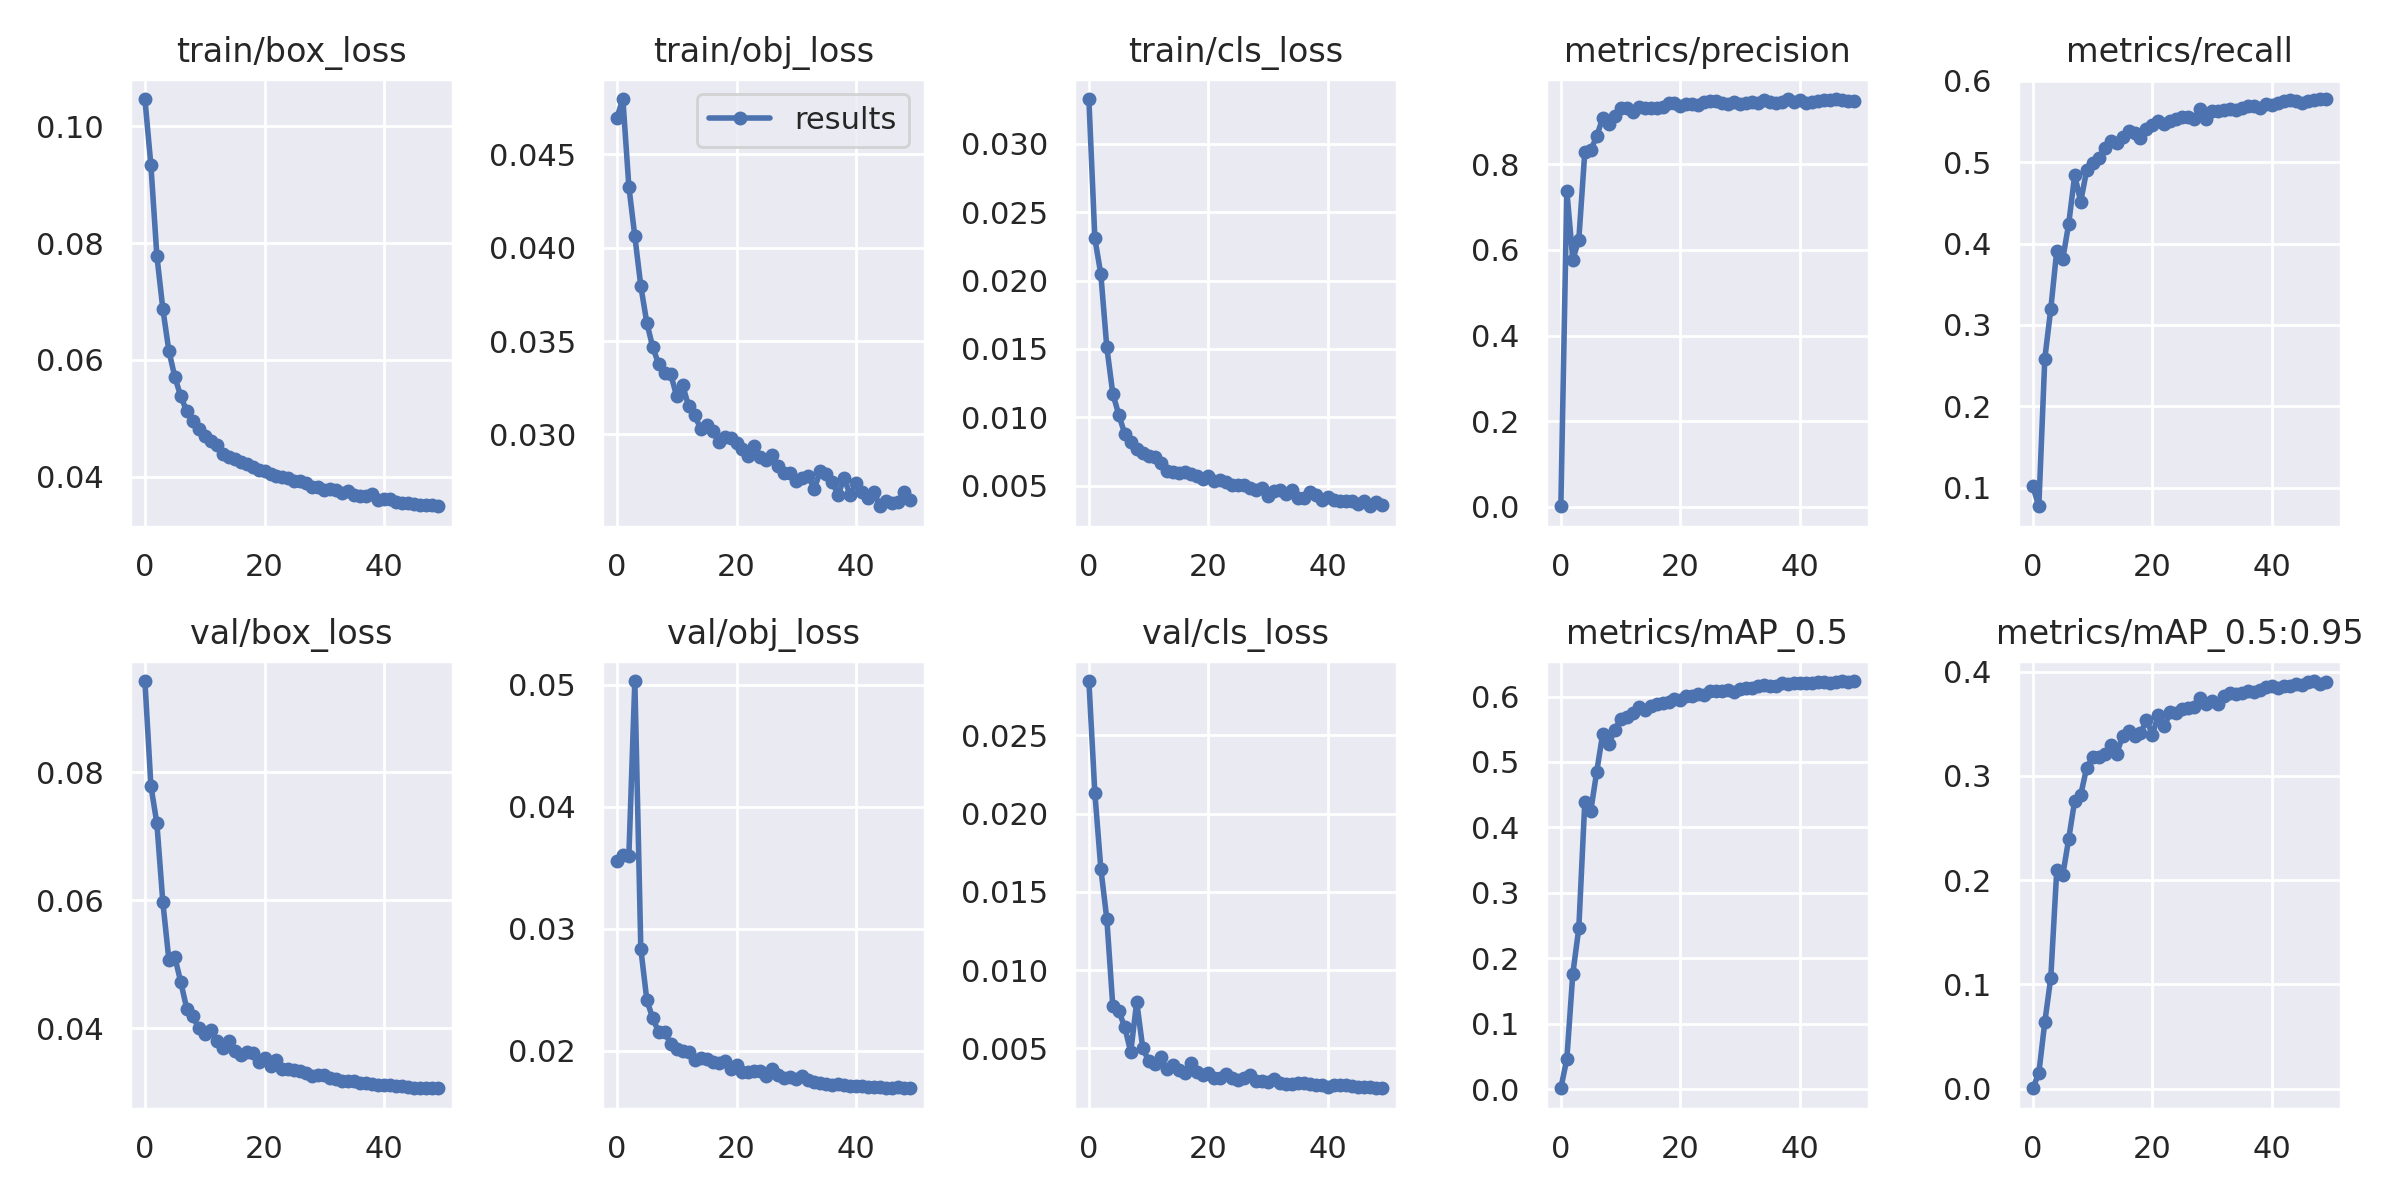

In [36]:
Image(filename='/content/yolov5/runs/train/hhw_results3/results.png', width=1000)

In [55]:
#검증
!python val.py --weights runs/train/hhw_results3/weights/best.pt --data ./hhw/data.yaml --img 416 --iou 0.65

val: data=./hhw/data.yaml, weights=['runs/train/hhw_results3/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-55-g632bf48 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/hhw/valid... 883 images, 0 backgrounds, 0 corrupt: 100% 883/883 [00:00<00:00, 955.57it/s]
val: New cache created: /content/yolov5/hhw/valid.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 28/28 [00:11<00:00,  2.48it/s]
                   all        883       4646      0.945      0.575      0.625       0.39
                  head        883       1145      0.901 

In [56]:
#테스트
!python val.py --weights runs/train/hhw_results3/weights/best.pt --data ./hhw/data.yaml --img 416 --task test

val: data=./hhw/data.yaml, weights=['runs/train/hhw_results3/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-55-g632bf48 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/hhw/test... 883 images, 0 backgrounds, 0 corrupt: 100% 883/883 [00:00<00:00, 1154.18it/s]
test: New cache created: /content/yolov5/hhw/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 28/28 [00:10<00:00,  2.55it/s]
                   all        883       4269      0.954      0.575      0.621      0.395
                  head        883       1063       0.92

In [57]:
#추론
!python detect.py --weights runs/train/hhw_results3/weights/best.pt --img 416 --conf 0.4 --source ./hhw/test/images

detect: weights=['runs/train/hhw_results3/weights/best.pt'], source=./hhw/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-55-g632bf48 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1766 /content/yolov5/hhw/test/images/005298_jpg.rf.7d1070e4a462d4c636a68e64f2013761.jpg: 416x416 7 helmets, 15.4ms
image 2/1766 /content/yolov5/hhw/test/images/005299_jpg.rf.a79cacc62cdd99ad871cf1786ad865ff.jpg: 416x416 1 helmet, 15.7ms
image 3/1766 /content/yolov5/hhw/test/images/005300_jpg.rf.419d88422f77db5d30bbb0e769c7

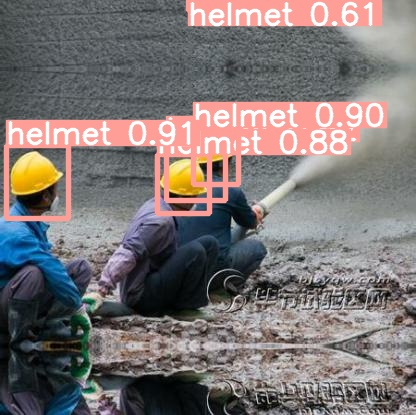

In [58]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'))
display(Image(filename=image_name))

In [59]:
#모델 내보내기
# %mkdir /content/drive/MyDrive/딥러닝
%cp /content/yolov5/runs/train/hhw_results3/weights/best.pt /content/drive/MyDrive/딥러닝